In [10]:
# Importing modules
import pandas as pd
!pip install wordcloud

     |████████████████████████████████| 366 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 41.9 MB/s eta 0:00:01


In [16]:
!pip install gensim
!pip install nltk

     |████████████████████████████████| 1.5 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 6.6 MB/s  eta 0:00:01
     |████████████████████████████████| 721 kB 20.4 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 5.9 MB/s  eta 0:00:01
     |████████████████████████████████| 303 kB 28.6 MB/s eta 0:00:01


In [24]:
!pip install pyLDAvis.gensim
!pip install pickle 
!pip install pyLDAvis

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim
ERROR: No matching distribution found for pyLDAvis.gensim
ERROR: Could not find a version that satisfies the requirement pickle
ERROR: No matching distribution found for pickle
     |████████████████████████████████| 1.7 MB 4.5 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 829 kB 24.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 29.8 MB/s eta 0:00:01    |▊                               | 266 kB 29.8 MB/s eta 0:00:01     |███████▍                        | 2.7 MB 29.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 46.5 MB/s eta 0:00:01    |████████████████▉               | 8.3 MB 46.5 MB/s eta 0:00:01
     |████████████████████████████████| 471 kB 53.2 MB/s eta 0:00:01
     |█████████████████████

In [3]:
papers=pd.read_csv('./data/papers.csv')
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [5]:

# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)


In [6]:
papers

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
...,...,...,...,...
63,1995,Adaptive Retina with Center-Surround Receptive...,Abstract Missing,Adaptive Retina with Center-Surround\nReceptiv...
64,1995,Forward-backward retraining of recurrent neura...,Abstract Missing,Forward-backward retraining of recurrent\nneur...
65,1995,When is an Integrate-and-fire Neuron like a Po...,Abstract Missing,When is an Integrate-and-fire Neuron\nlike a P...
66,1995,From Isolation to Cooperation: An Alternative ...,Abstract Missing,From Isolation to Cooperation:\nAn Alternative...


In [7]:

# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head

<bound method NDFrame.head of 0     767\n\nself-organization of associative databa...
1     683\n\na mean field theory of layer iv of visu...
2     394\n\nstoring covariance by the associative\n...
3     bayesian query construction for neural\nnetwor...
4     neural network ensembles cross\nvalidation and...
                            ...                        
63    adaptive retina with center-surround\nreceptiv...
64    forward-backward retraining of recurrent\nneur...
65    when is an integrate-and-fire neuron\nlike a p...
66    from isolation to cooperation:\nan alternative...
67    from isolation to cooperation:\nan alternative...
Name: paper_text_processed, Length: 68, dtype: object>

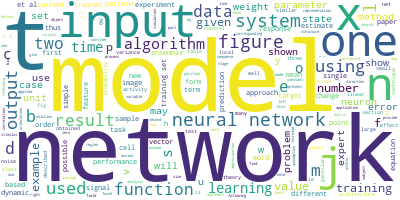

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()